# QuickDraw

![alt text](https://raw.githubusercontent.com/googlecreativelab/quickdraw-dataset/master/preview.jpg)

In [0]:
#!wget https://raw.githubusercontent.com/zaidalyafeai/QuickDraw10/master/quick_draw10.py    #dataset 가져오기 파이썬 코드

# Imports

In [0]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
#from quick_draw10 import download_and_load, plot_tsne      # 불필요(이 코드내에서 직접 dataset 가져옴)
import matplotlib.patheffects as PathEffects
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from random import *

import urllib.request
from sklearn.manifold import TSNE

from google.colab import drive, files
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2

image_size = 28

In [0]:
### 모든 dataset을 가져오기 어렵기 때문에 가져올 클래스만 정의 ###

class_names = ['cloud', 'sun', 'pants', 'umbrella', 'table', 'ladder', 'eyeglasses', 'clock', 'scissors', 'cup','apple','pizza','eye','frog','flower','hand','foot','donut','elephant','bicycle','candle','chair','face','fish','tree']  #원하는 클래스 정의
#class_names = ['cloud', 'sun', 'pants', 'umbrella', 'table']  #테스트용

class_count = len(class_names)    #클래스 갯수

In [0]:
### dataset 이미지 npy 가져오기 ###

# Random state.
RS = 20150101


# We import seaborn to make nice plots.
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

root = 'data'
def download_and_load(test_split = 0.2, max_items_per_class = 20000):   #클래스마다 가져올 이미지 갯수 0000
  os.mkdir(root) 
  print('downloading ...')
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'        #GCP QuickDraw bitmap dataset 이용
  for c in class_names:
    path = base+c+'.npy'
    print(path)
    urllib.request.urlretrieve(path, f'{root}/{c}.npy')
  print('loading ...')
  
  #initialize variables 
  x = np.empty([0, 784])
  y = np.empty([0])

  #load each data file 
  for idx, file in enumerate(class_names):
      data = np.load(f'{root}/{file}.npy')
      #data = np.load(f'{root}/{file}.npy', encoding='latin1', allow_pickle=True)
      data = data[0: max_items_per_class, :]    # max_items_per_class 만큼만 array
      labels = np.full(data.shape[0], idx)

      x = np.concatenate((x, data), axis=0)
      y = np.append(y, labels)

  data = None
  labels = None

  #randomize the dataset 
  permutation = np.random.permutation(y.shape[0])
  x = x[permutation, :]
  y = y[permutation]

  #reshape and inverse the colors 
  x = 255 - np.reshape(x, (x.shape[0], image_size, image_size))


  #separate into training and testing 
  test_size  = int(x.shape[0]/100*(test_split*100))

  x_test = x[0:test_size, :]
  y_test = y[0:test_size]

  x_train = x[test_size:x.shape[0], :]
  y_train = y[test_size:y.shape[0]]
  
  print('Training Data : ', x_train.shape[0])
  print('Testing  Data : ', x_test.shape[0])
  return x_train, y_train, x_test, y_test, class_names

def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", class_count))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(class_count):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, class_names[i], fontsize=15)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
        
def plot_tsne(X, y):
  print('calculating tsne ...')
  proj = TSNE(random_state=RS).fit_transform(X)
  scatter(proj, y)

In [0]:
### GPU 사용여부 확인 ###
#tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Load the Data 

In [23]:
if (os.path.isdir(root)) :
  import shutil
  shutil.rmtree(root)     # npy 파일 다운로드 경로 초기화(이미 받아놓은 파일 삭제)
x_train, y_train, x_test, y_test, class_names = download_and_load()

downloading ...
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cloud.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pants.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/umbrella.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/table.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/clock.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/scissors.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cup.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pizza.npy
https://storage.googleapis.com/quickdraw_dataset/ful

In [24]:
class_names

['cloud',
 'sun',
 'pants',
 'umbrella',
 'table',
 'ladder',
 'eyeglasses',
 'clock',
 'scissors',
 'cup',
 'apple',
 'pizza',
 'eye',
 'frog',
 'flower',
 'hand',
 'foot',
 'donut',
 'elephant',
 'bicycle',
 'candle',
 'chair',
 'face',
 'fish',
 'tree']

# Visualization

In [0]:
### 가져온 이미지 시각화 ###
def visualize_classes():
  for i in range(0, class_count):
    img_batch = x_train[y_train == i][0:class_count]
    img_batch = np.reshape(img_batch, (img_batch.shape[0]*img_batch.shape[1], img_batch.shape[2]))
    if i > 0:
      img = np.concatenate([img, img_batch], axis = 1)
    else:
      img = img_batch
  plt.figure(figsize=(10,20))
  plt.axis('off')
  plt.imshow(img)

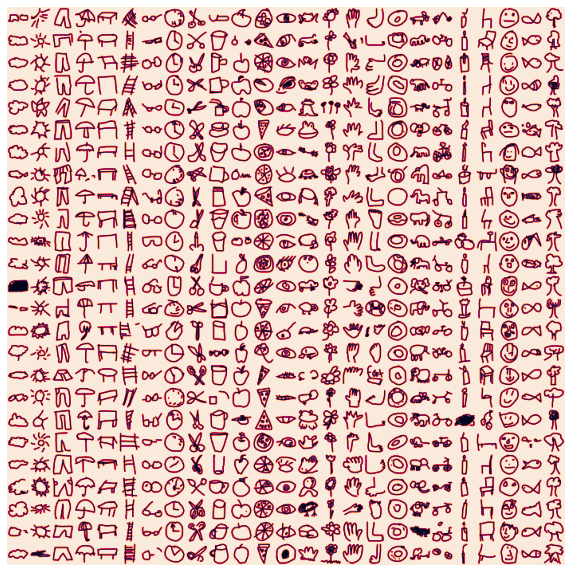

In [26]:
visualize_classes()

## Labels distirubtion

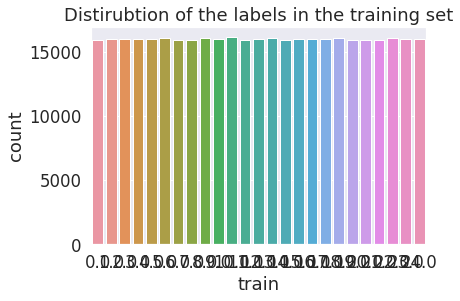

In [13]:
### 클래스별 트레이닝용 이미지 수 ###

data = {}
data['train'] = y_train
df = pd.DataFrame.from_dict(data)
ax = sns.countplot(x = 'train', data=df).set_title("Distirubtion of the labels in the training set")

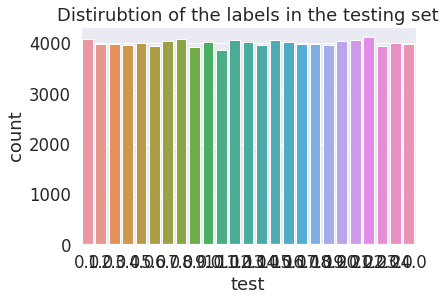

In [14]:
### 클래스별 테스트용 이미지 수 ###

data = {}
data['test'] = y_test
df = pd.DataFrame.from_dict(data)
ax = sns.countplot(x = 'test', data=df).set_title("Distirubtion of the labels in the testing set")

## T-SNE

plot a t-sne distirubtion of 1000 sample from the training set 

calculating tsne ...


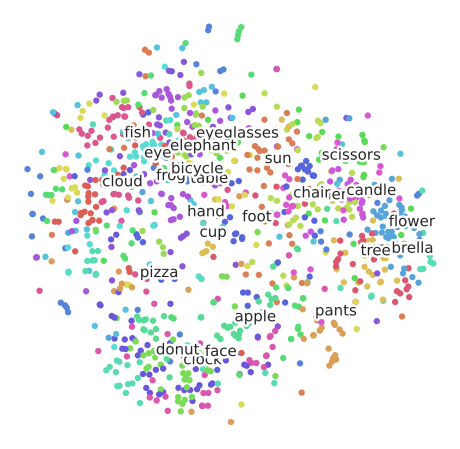

In [15]:
### 트레이닝용 이미지  TSNE 군집분포 ###

X = np.reshape(x_train, (x_train.shape[0], image_size * image_size))[0:1000]
y = y_train[0:1000]
plot_tsne(X, y)

# Preprocess the Data 

In [0]:
### 데이터 전처리 ###

image_size = 28

# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, len(class_names))
y_test = keras.utils.to_categorical(y_test, len(class_names))

# The Model 

In [30]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import GlobalAvgPool2D

# Define model
model = keras.Sequential()
#'''
### Model 1 ###       엄청빠름, 정확도는 비교적 높음
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(class_names), activation='softmax')) 

# Train model
#adam = tf.train.AdamOptimizer()
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
#'''
'''
### Model 2 ###    속도는 중간,  정확도는 그럭저럭
model.add(layers.Convolution2D(32, (5, 5),
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.Convolution2D(32, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(layers.Convolution2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(class_names), activation='softmax'))

# Train model
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
'''
'''
### Model 3 ###     엄청 빠름, 정확도는 별로
model.add(layers.Convolution2D(24, (5, 5),
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(15, (3, 3), activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(len(class_names), activation='softmax')) 

# Train model
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
'''
'''
### Model 4 ###     느림, 정확도는 비교적 높음
model.add(layers.Convolution2D(32, (5, 5),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(layers.Convolution2D(128, (5, 5), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2),strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(len(class_names), activation='softmax')) 

# Train model
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
'''
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)              

# Training 

In [31]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, epochs=10)

Epoch 1/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7780 - accuracy: 0.7876 - val_loss: 0.4661 - val_accuracy: 0.8727
Epoch 2/10
1407/1407 [==============================] - 6s 5ms/step - loss: 0.4131 - accuracy: 0.8888 - val_loss: 0.3872 - val_accuracy: 0.8935
Epoch 3/10
1407/1407 [==============================] - 6s 5ms/step - loss: 0.3506 - accuracy: 0.9044 - val_loss: 0.3414 - val_accuracy: 0.9075
Epoch 4/10
1407/1407 [==============================] - 6s 5ms/step - loss: 0.3142 - accuracy: 0.9139 - val_loss: 0.3229 - val_accuracy: 0.9115
Epoch 5/10
1407/1407 [==============================] - 6s 5ms/step - loss: 0.2900 - accuracy: 0.9201 - val_loss: 0.3095 - val_accuracy: 0.9154
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2720 - accuracy: 0.9248 - val_loss: 0.2957 - val_accuracy: 0.9186
Epoch 7/10
1407/1407 [==============================] - 6s 5ms/step - loss: 0.2573 - accuracy: 0.9287 - val_loss: 0.2955 - val_accuracy:

# Testing 

In [32]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 92.12%


# Check Some Incorrect Labeling

True Label  scissors
Pred Label  frog


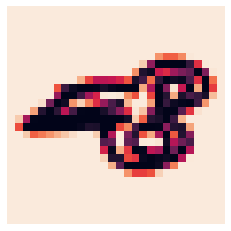

In [34]:
#get predictions and true labels
yhat = np.argmax(model.predict(x_test), axis = 1)
y    = np.argmax(y_test, axis = 1)

#get the indices of the bad labels 
bad_labels = np.argwhere((y == yhat) == False).squeeze()

#choose a random index with incorrect label 
idx = np.random.choice(bad_labels)

print('True Label ',class_names[y[idx]])
print('Pred Label ',class_names[yhat[idx]])
plt.imshow(x_test[idx].squeeze())
plt.axis('off')
plt.show()

# Save Model

In [0]:
# Colab 런타임내에서 모델 저장

from google.colab import drive, files

modelfilename = 'quickdrawmodel.h5'

if os.path.isfile(modelfilename):
    os.remove(modelfilename)

model.save(modelfilename)

# 구글 드라이브에 모델 저장
drive.mount('/gdrive', force_remount=True)
modelfilename = '/gdrive/My Drive/Colab Notebooks/models/quickdraw/quickdrawmodel.h5'
if os.path.isfile(modelfilename):
    os.remove(modelfilename)
#model.save('/gdrive/My Drive/Colab Notebooks/models/quickdraw/quickdrawmodel.h5')
model.save(modelfilename)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


# Load Model

In [0]:
'''
from google.colab import drive, files
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2
'''
drive.mount('/gdrive', force_remount=True)

loaded_model = tf.keras.models.load_model('/gdrive/My Drive/Colab Notebooks/models/quickdraw/quickdrawmodel.h5')       # 구글 드라이브에 저장된 모델 load
#loaded_model = tf.keras.models.load_model('quickdrawmodel.h5')   # Colab 런타임내에서 저장된 모델 load
loaded_model.summary()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        

# Define Load Images

In [0]:
def upload_from_local(upload_x, image_size, loaded_fn):       #로컬 PC에서 파일 업로드 기능 이용하여 이미지 업로드

  [os.remove(f) for f in glob.glob("/content/*.jpg")]
  [os.remove(f) for f in glob.glob("/content/*.bmp")]
  [os.remove(f) for f in glob.glob("/content/*.png")]

  upload_img = files.upload()

  for fn in upload_img.keys():
    print('User uploaded "{name}" with length {length} bytes'.format(name=fn, length=len(upload_img[fn])))
    loaded_test_img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)   # 이미지 색상 정보 제거(gray로 읽어들이기)
    ret, loaded_test_img = cv2.threshold(loaded_test_img, 250, 255, cv2.THRESH_BINARY_INV)
    #blur = cv2.GaussianBlur(loaded_test_img,(5,5),0)    #가우시안 블러
    #ret, loaded_test_img = cv2.threshold(loaded_test_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)    ## OTSU
    height, width = loaded_test_img.shape[:2]     # 읽어들이 이미지의 사이즈 확인
    if (width*height) != 784:     #만일 사이즈가 28 * 28 이 아니라면
        #loaded_test_img = cv2.resize(loaded_test_img, dsize=(image_size, image_size))    # 강제로 사이즈 변화
        loaded_test_img = cv2.resize(loaded_test_img, dsize=(image_size, image_size), interpolation = cv2.INTER_AREA)
    loaded_test_img = loaded_test_img.reshape(1,784)    # array reshape
    fn_array = np.full(loaded_test_img.shape[0], fn)
    upload_x = np.concatenate((upload_x, loaded_test_img), axis=0)
    loaded_fn = np.append(loaded_fn, fn_array)
  
  loaded_test_img = None
  return upload_x, loaded_fn

def load_from_files(upload_x, image_size, loaded_fn):        #특정 경로에서 한꺼번에 이미지 업로드(또는 로컬 PC에서 한꺼번에 load)

  #from PIL import Image
  drive.mount('/gdrive', force_remount=True)
  for fn in glob.iglob('/gdrive/My Drive/Colab Notebooks/datasets/quickdraw_test/*.png'):
    loaded_test_img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)   # 이미지 색상 정보 제거(gray로 읽어들이기)
    ret, loaded_test_img = cv2.threshold(loaded_test_img, 250, 255, cv2.THRESH_BINARY_INV)
    #blur = cv2.GaussianBlur(loaded_test_img,(5,5),0)    #가우시안 블러
    #ret, loaded_test_img = cv2.threshold(loaded_test_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)    # OTSU
    print('User uploaded "{name}" with length {length} bytes'.format(name=fn, length=loaded_test_img.size))
    height, width = loaded_test_img.shape[:2]     # 읽어들이 이미지의 사이즈 확인
    if (width*height) != 784:     #만일 사이즈가 28 * 28 이 아니라면
        loaded_test_img = cv2.resize(loaded_test_img, dsize=(image_size, image_size), interpolation = cv2.INTER_AREA)         # 강제로 사이즈 변화
    loaded_test_img = loaded_test_img.reshape(1,784)    # array reshape
    fn_array = np.full(loaded_test_img.shape[0], fn)
    upload_x = np.concatenate((upload_x, loaded_test_img), axis=0)
    loaded_fn = np.append(loaded_fn, fn_array)
    
  loaded_test_img = None
  return upload_x, loaded_fn

# Load Image & Prediction

Saving 2_original.png to 2_original.png
Saving 2_resize_mspaint.png to 2_resize_mspaint.png
Saving 2_resize_photoshop_pixels.png to 2_resize_photoshop_pixels.png
Saving 2_resize_photoshop_smart.png to 2_resize_photoshop_smart.png
Saving 2_resize_powertoy.png to 2_resize_powertoy.png
Saving 3.png to 3.png
Saving 4.png to 4.png
Saving 5.png to 5.png
Saving 6.png to 6.png
Saving 7_original.png to 7_original.png
Saving 7_resize_mspaint.png to 7_resize_mspaint.png
Saving 7_resize_photoshop_pixels.png to 7_resize_photoshop_pixels.png
Saving 7_resize_photoshop_smart.png to 7_resize_photoshop_smart.png
Saving 7_resize_powertoy.png to 7_resize_powertoy.png
Saving 8_original.png to 8_original.png
Saving 8_resize_photoshop_pixels1.png to 8_resize_photoshop_pixels1.png
Saving 8_resize_photoshop_pixels2.png to 8_resize_photoshop_pixels2.png
Saving 9.png to 9.png
User uploaded "2_original.png" with length 6670 bytes
User uploaded "2_resize_mspaint.png" with length 1171 bytes
User uploaded "2_resize_

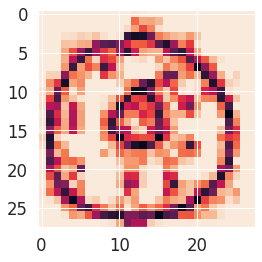

The Class prediction is  donut , and file name is  2_resize_mspaint.png


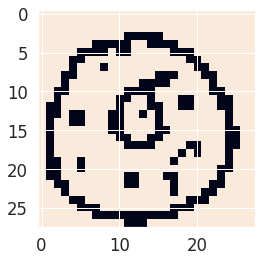

The Class prediction is  donut , and file name is  2_resize_photoshop_pixels.png


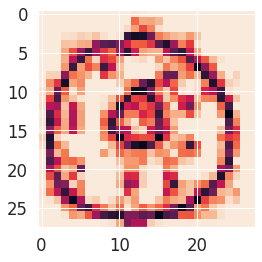

The Class prediction is  donut , and file name is  2_resize_photoshop_smart.png


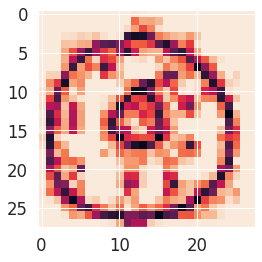

The Class prediction is  donut , and file name is  2_resize_powertoy.png


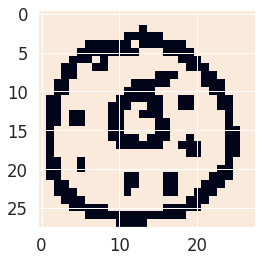

The Class prediction is  eyeglasses , and file name is  3.png


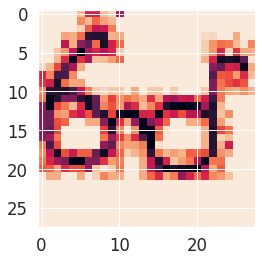

The Class prediction is  foot , and file name is  4.png


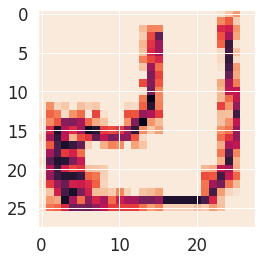

The Class prediction is  flower , and file name is  5.png


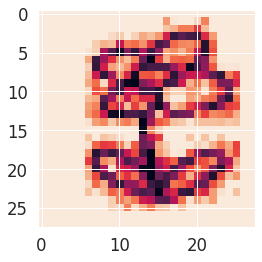

The Class prediction is  frog , and file name is  6.png


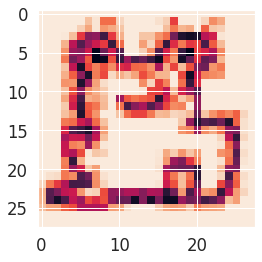

The Class prediction is  elephant , and file name is  7_original.png


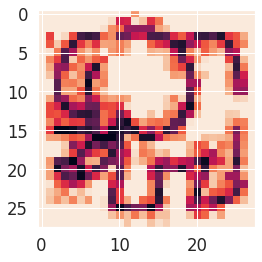

The Class prediction is  elephant , and file name is  7_resize_mspaint.png


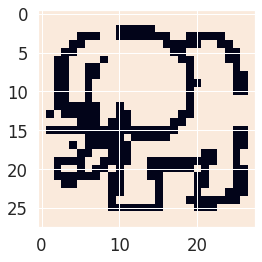

The Class prediction is  elephant , and file name is  7_resize_photoshop_pixels.png


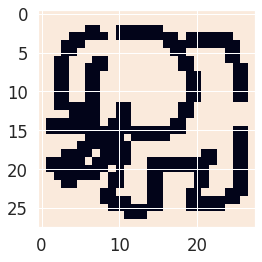

The Class prediction is  elephant , and file name is  7_resize_photoshop_smart.png


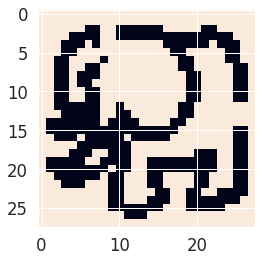

The Class prediction is  elephant , and file name is  7_resize_powertoy.png


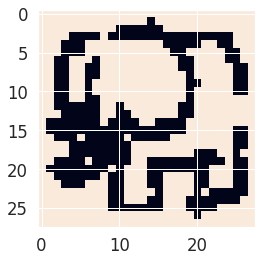

The Class prediction is  flower , and file name is  8_original.png


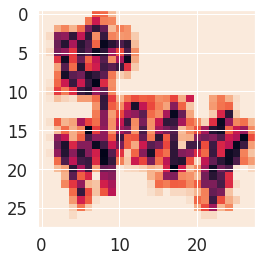

The Class prediction is  frog , and file name is  8_resize_photoshop_pixels1.png


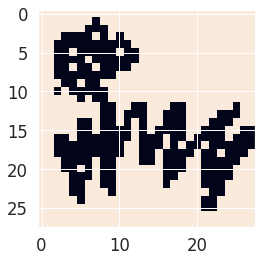

The Class prediction is  frog , and file name is  8_resize_photoshop_pixels2.png


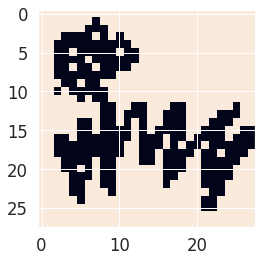

The Class prediction is  ladder , and file name is  9.png


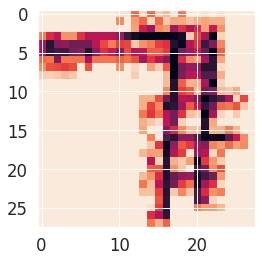

In [37]:
#initialize variables 
#image_size = 28
upload_x = np.empty([0,(image_size*image_size)])
upload_x_test = np.empty ([0,image_size,image_size])
loaded_fn = np.empty([0])

upload_x, loaded_fn  = upload_from_local(upload_x, image_size, loaded_fn)    #파일 업로드 버튼을 눌러 이미지 파일 로드
#upload_x,loaded_fn  = load_from_files(upload_x, image_size, loaded_fn)      #지정된 경로에 있는 PNG 파일을 한꺼번에 로드

upload_x = 255 - np.reshape(upload_x, (upload_x.shape[0], image_size, image_size))

upload_x_test = upload_x[0:upload_x.shape[0],:]


print('Testing  Data : ', upload_x_test.shape[0])
upload_x_test = upload_x_test.reshape(upload_x_test.shape[0], image_size, image_size, 1).astype('float32')
upload_x_test /= 255.0


#pred = np.argmax(loaded_model.predict(upload_x_test), axis = 1)   # 따로 저장한 모델을 불러와서 사용할때
pred = np.argmax(model.predict(upload_x_test), axis = 1)     # 현재 저장되어 있는 모델을 그대로 사용할때

#이미지 예측 결과 및 파일이름, 이미지 보여주기
for index, value in enumerate(pred):
  pred_class = class_names[value]
  print('The Class prediction is ', pred_class, ', and file name is ',loaded_fn[index])
  plt.imshow(upload_x_test[index].squeeze())
  plt.show()

# References

* [Fashion-MNIST](https://hanxiao.github.io/2017/08/26/Fashion-MNIST-a-Drop-In-Replacement-of-MNIST-for-Benchmarking-Machine-Learning-Algorithms/)

* [t-SNE tutorial](https://github.com/oreillymedia/t-SNE-tutorial)

* [The quickdraw projec](https://github.com/googlecreativelab/quickdraw-dataset#projects-using-the-dataset)